In [1]:
!cd /kaggle/working
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip install roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 17778, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 17778 (delta 98), reused 51 (delta 51), pack-reused 17623 (from 3)
Receiving objects: 100% (17778/17778), 17.11 MiB | 19.72 MiB/s, done.
Resolving deltas: 100% (12082/12082), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.2 MB/s eta 0:00:00a 0:00:01


## 1. Ortam Bilgisi

- Framework: YOLOv5
- Model: YOLOv5n
- Image Size: 640
- Dataset: Fallen Person Dataset
- Device: GPU (Kaggle - Tesla P100)

In [22]:
import torch
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [25]:
model_path = "runs/train/y5n_640_e1002/weights/best.pt"

In [8]:
content = """path: /kaggle/working/dataset

train: train/images
val: valid/images
test: test/images

nc: 4
names: ['fallen', 'lying', 'sitting', 'standing']
"""

with open("/kaggle/working/dataset/data.yaml", "w") as f:
    f.write(content)

data.yaml absolute path ile güncellendi


In [17]:
%%bash

python train.py \
  --img 640 \
  --batch 16 \
  --epochs 100 \
  --data /kaggle/working/dataset/data.yaml \
  --weights yolov5n.pt \
  --name y5n_640_e100 \
  --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2026-01-02 18:34:52.559186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767378892.580553     279 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767378892.586959     279 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767378892.603601     279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767378892.603637     279 computation_placer.cc:177] computation placer already registere

## Eğitim Sonrası Performans Grafikleri

Aşağıdaki grafikler, eğitim sürecinde elde edilen train ve validation metriklerini göstermektedir.

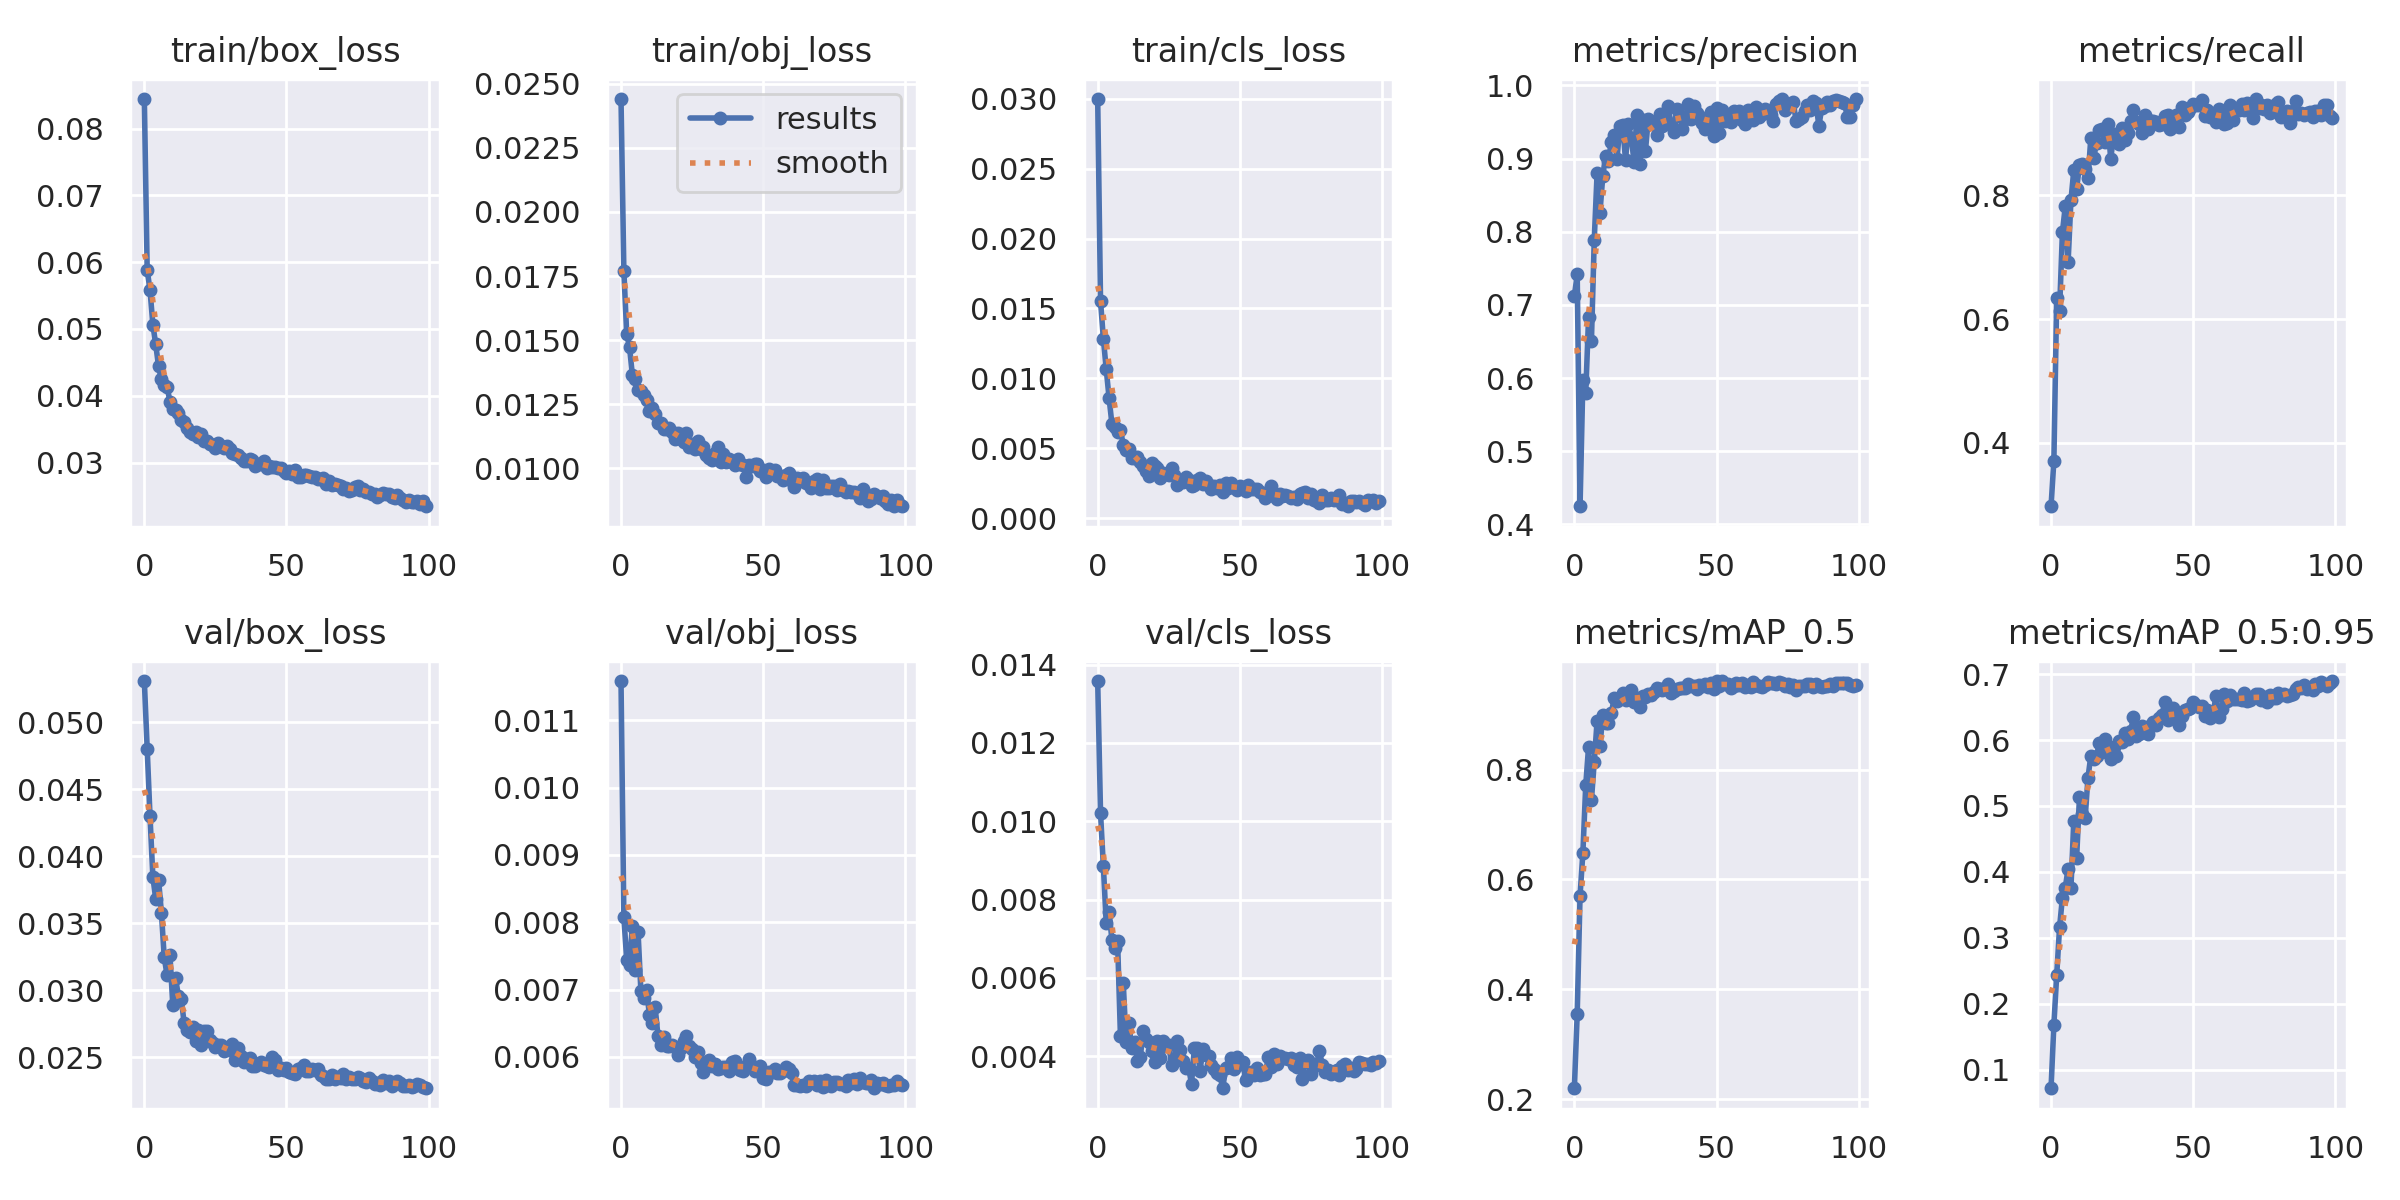

In [26]:
from IPython.display import Image, display
display(Image(filename="runs/train/y5n_640_e1002/results.png"))

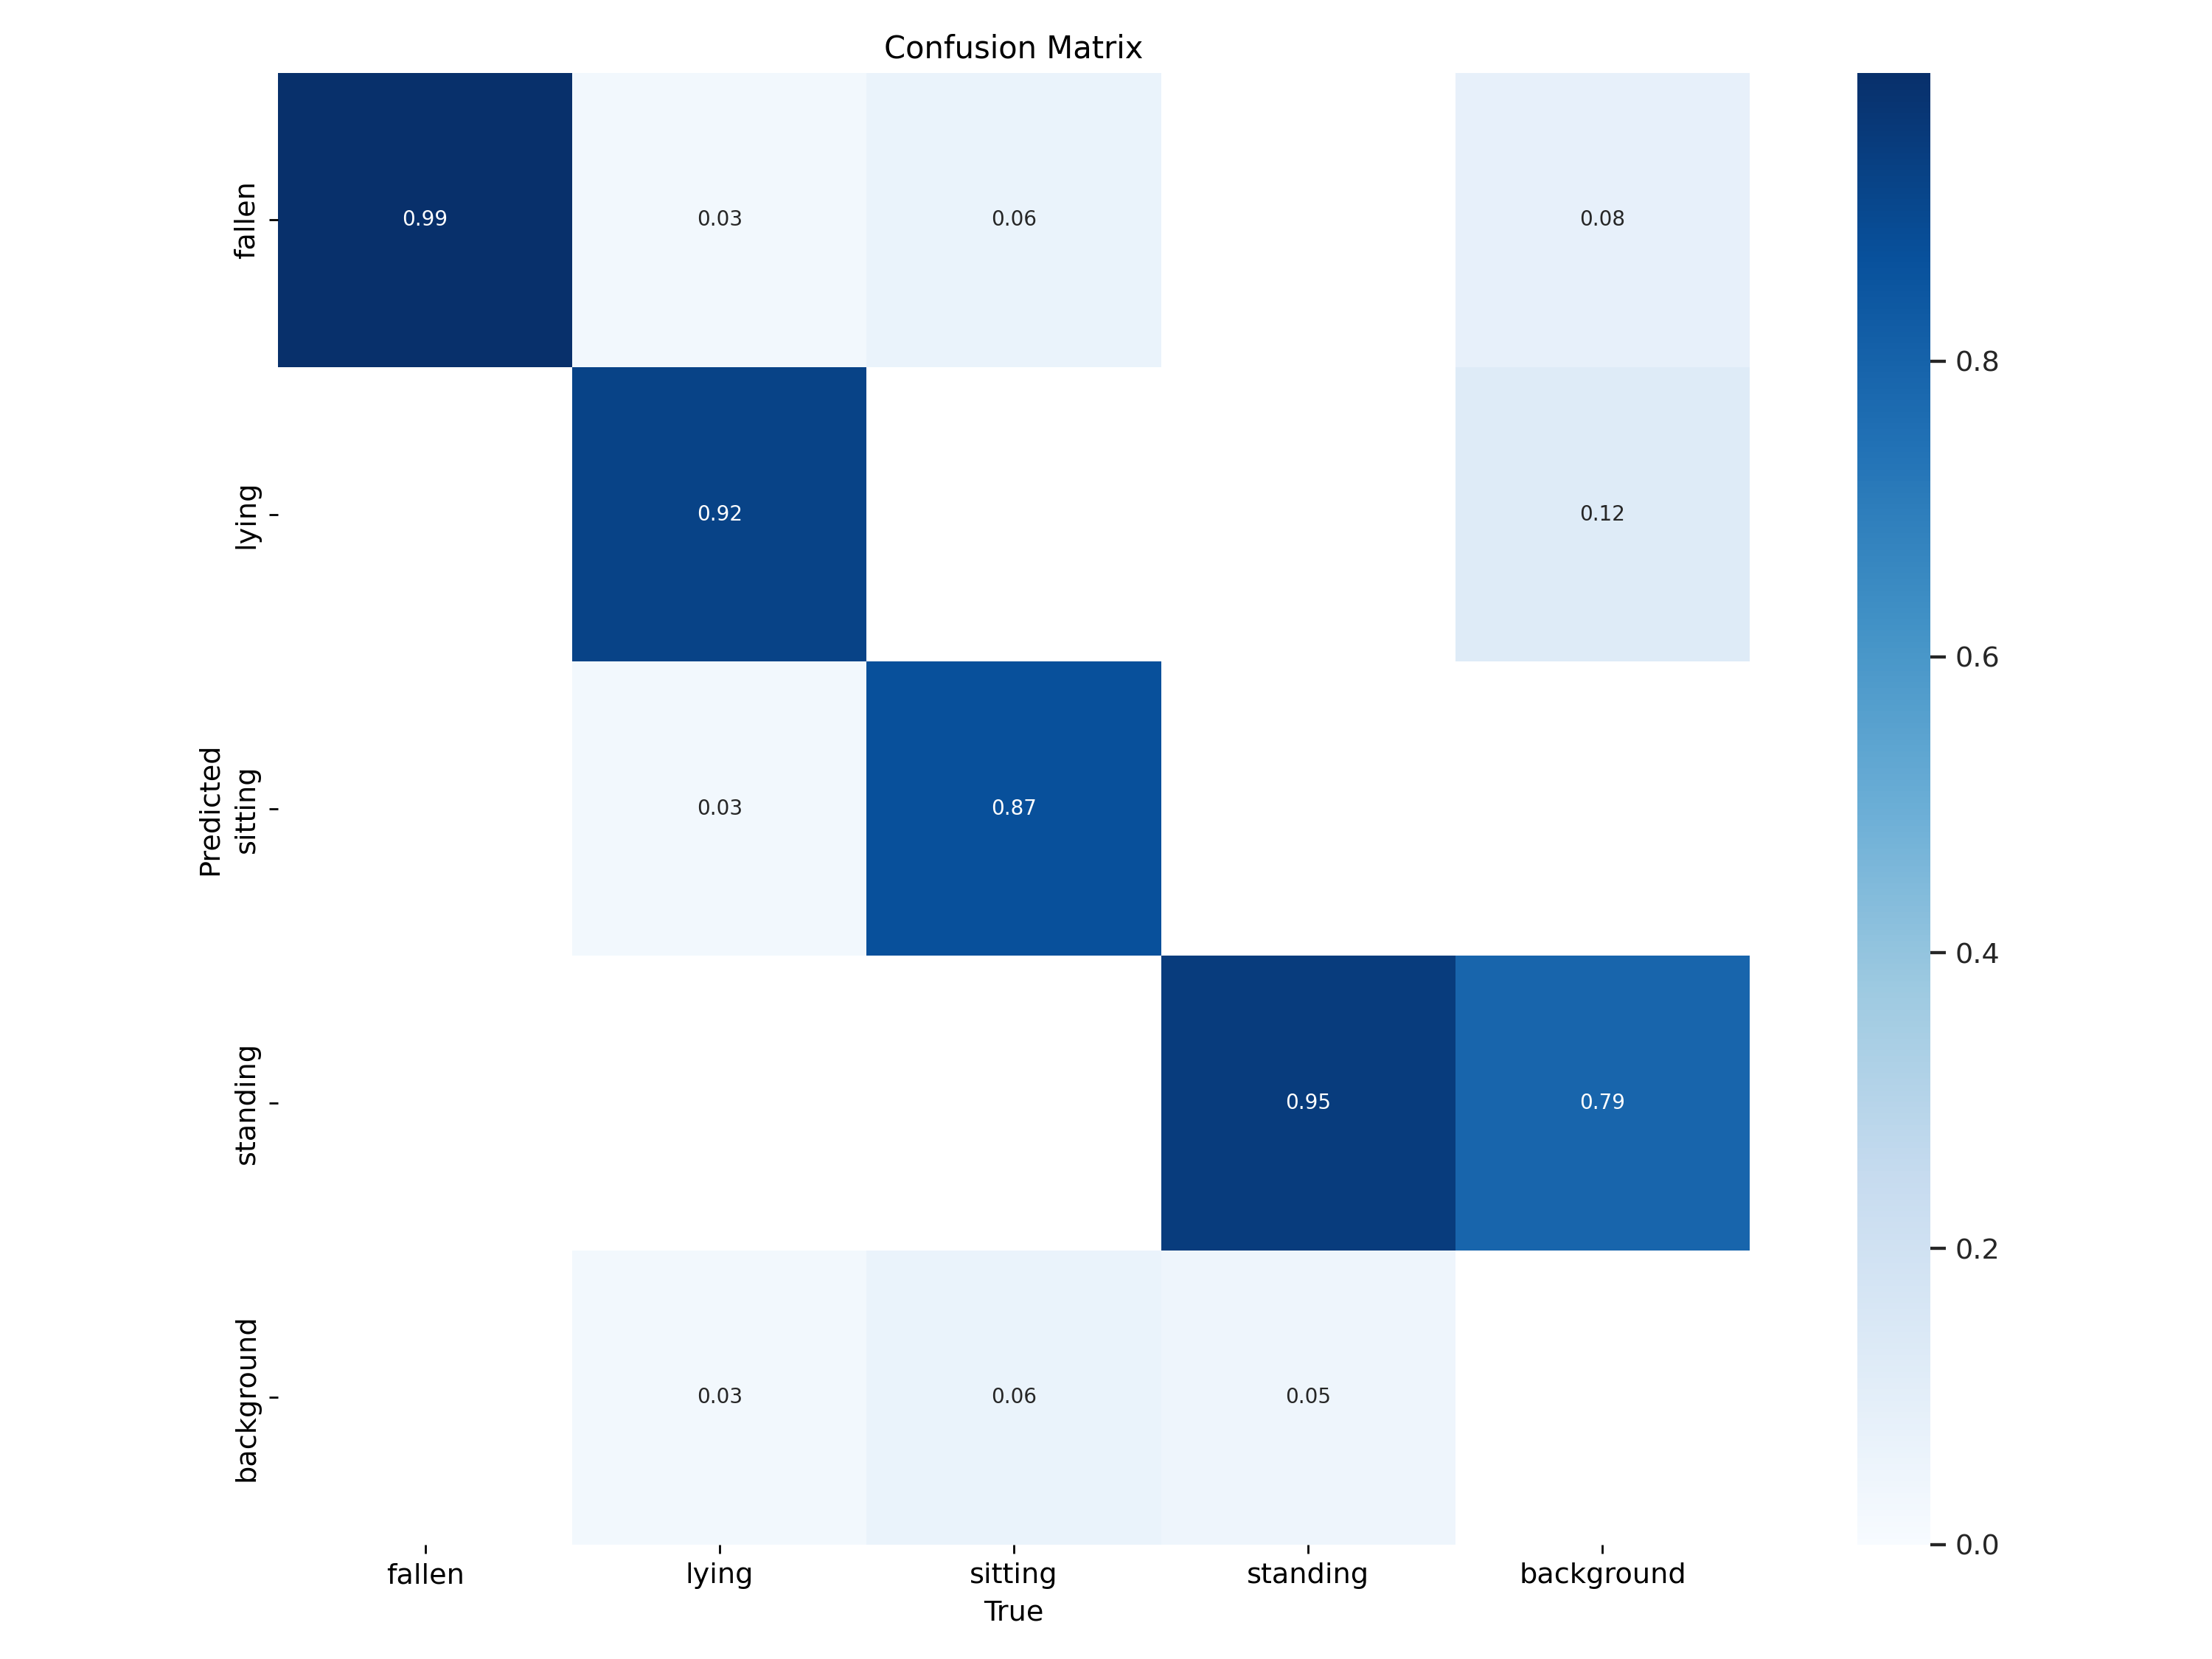

In [27]:
display(Image(filename="runs/train/y5n_640_e1002/confusion_matrix.png"))

## Örnek Tespit Sonuçları

Aşağıda modelin validation görüntüleri üzerindeki örnek tahminleri gösterilmektedir.

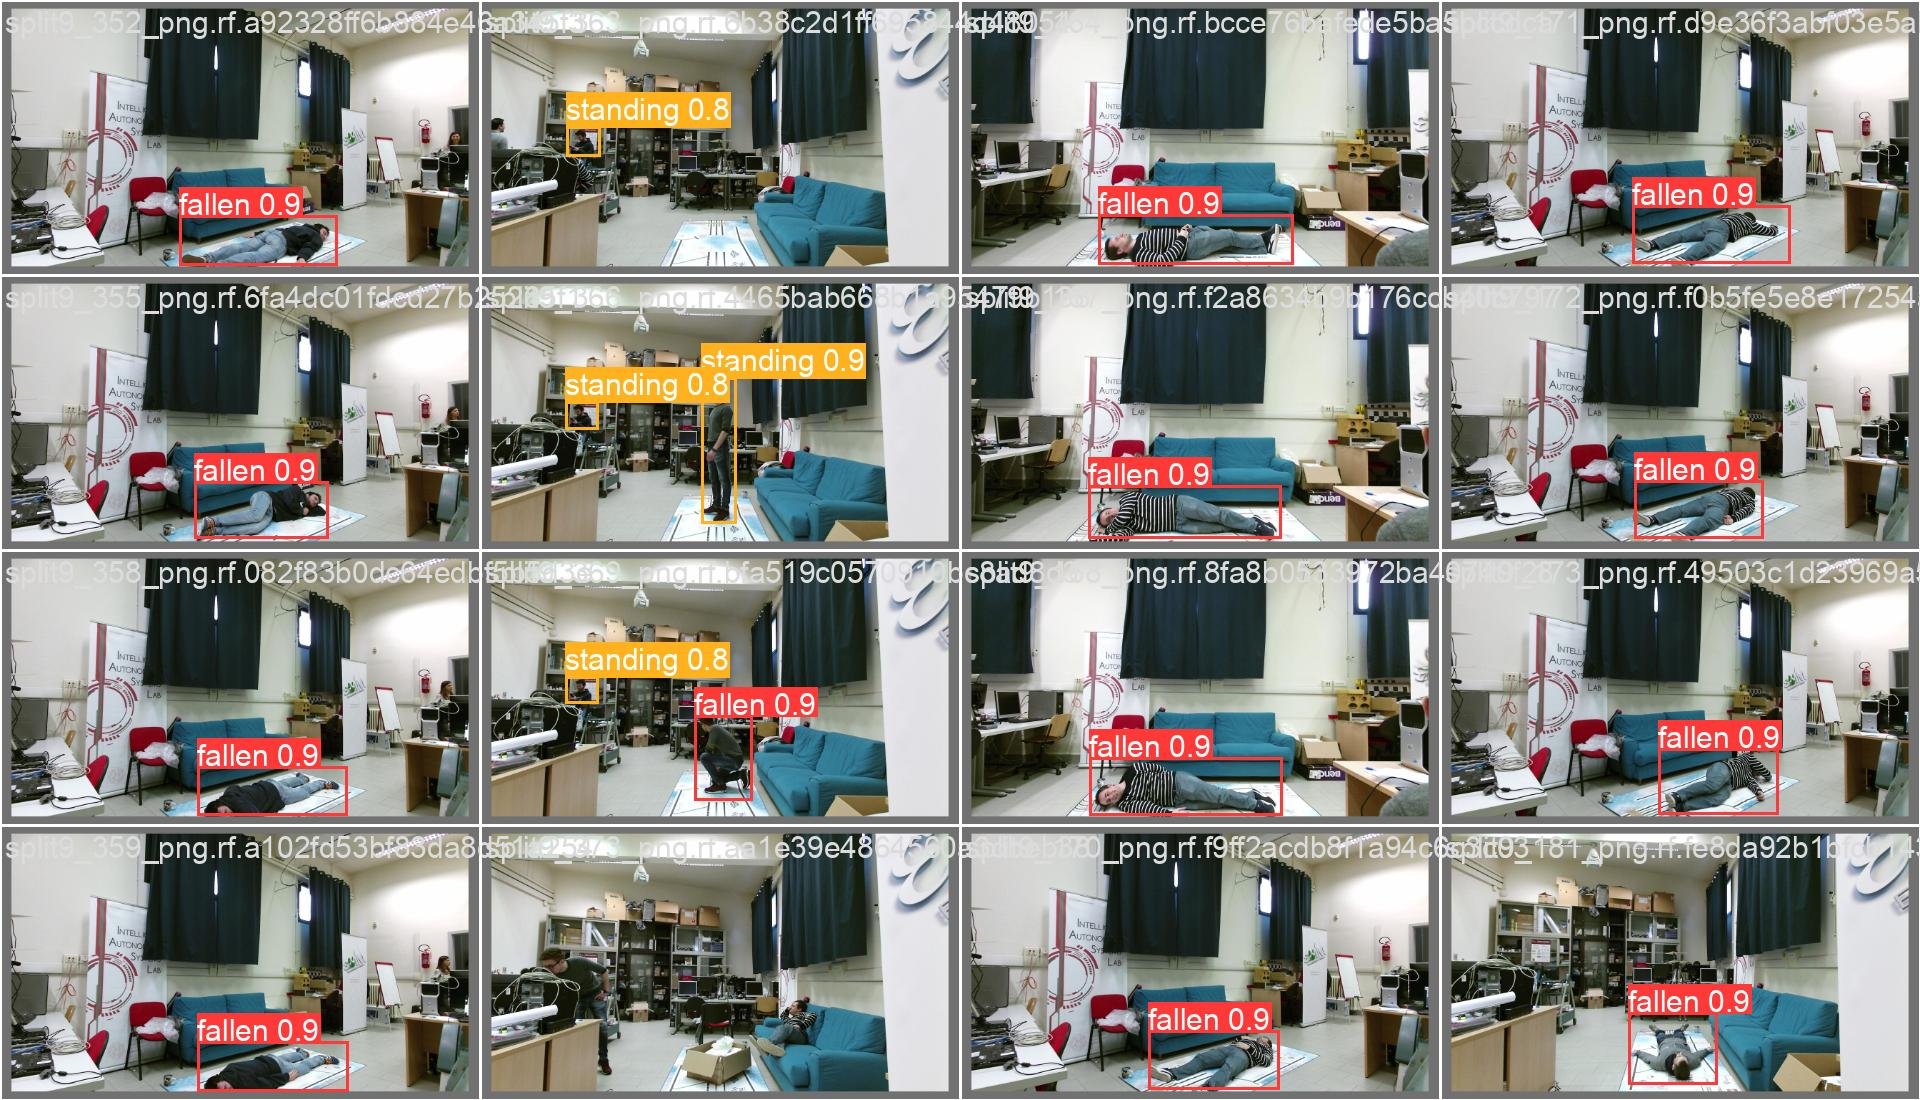

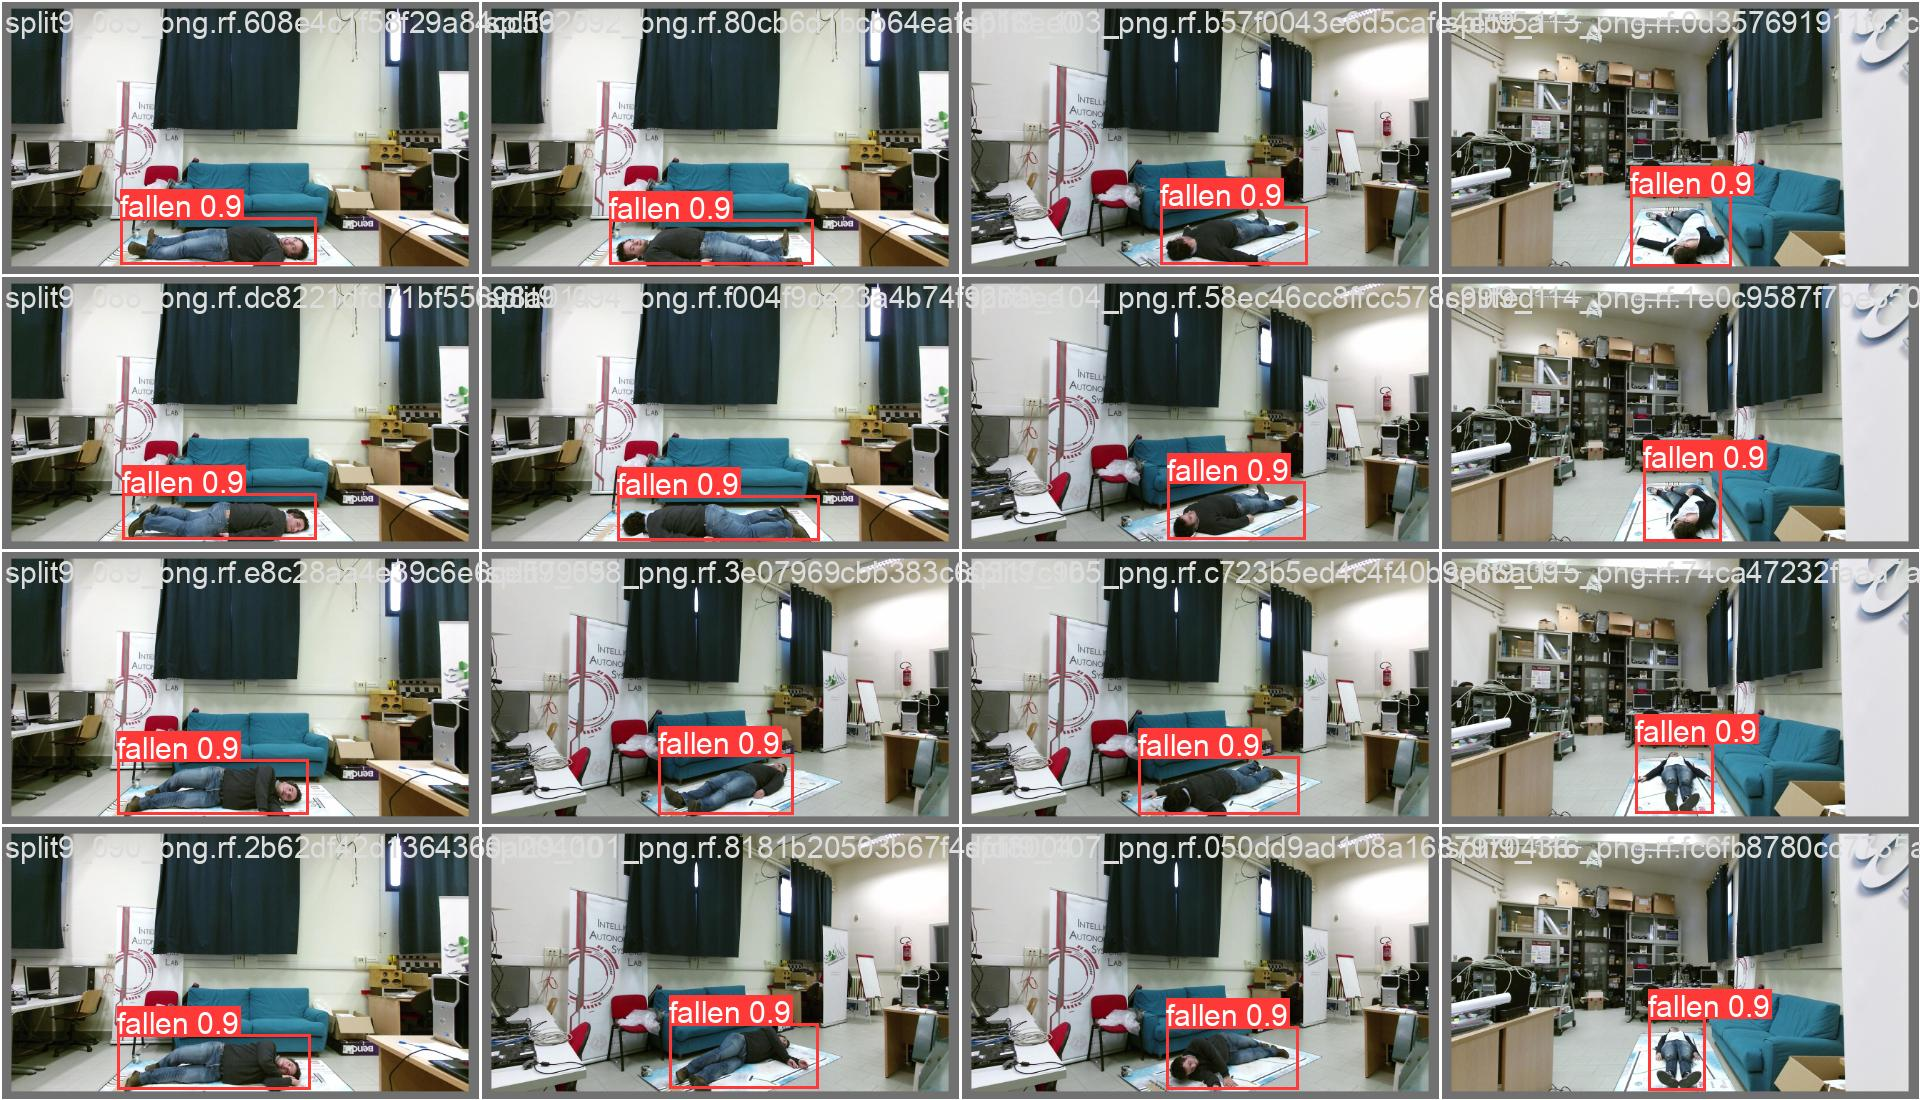

In [28]:
display(Image(filename="runs/train/y5n_640_e1002/val_batch0_pred.jpg"))
display(Image(filename="runs/train/y5n_640_e1002/val_batch1_pred.jpg"))

## Gerçek Zamanlılık (Speed / FPS Analizi)

Validation aşamasında ölçülen hız değerleri:

- Pre-process: ~0.1 ms
- Inference: ~1.7 ms
- NMS: ~1.4 ms
- Toplam: ~3.2 ms / image

Bu değerler GPU ortamında yaklaşık **300+ FPS** anlamına gelmektedir.

Edge cihazlarda bu hızın düşmesi beklenmektedir.

Speed: 
0.1ms pre-process
1.7ms inference
1.4ms NMS
per image

0.1 + 1.7 + 1.4 ≈ 3.2 ms / image

FPS ≈ 1000 / 3.2 ≈ 312 FPS


In [29]:
%%bash
cd /kaggle/working/yolov5

python val.py \
  --weights runs/train/y5n_640_e1002/weights/best.pt \
  --data /kaggle/working/dataset/data.yaml \
  --img 640 \
  --task speed

val: data=/kaggle/working/dataset/data.yaml, weights=['runs/train/y5n_640_e1002/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=speed, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 1764577 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /kaggle/working/dataset/valid/labels.cache... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 18/18 [00:04<00:00,  3.78it/s]
                   all        576        666       0.95      0.944      0.966      0.727
                fallen        576        377       0.97 